$$
f(x) = \cos(x) \\
\frac{df}{dx} = -\sin(x) \\
\frac{df}{dx} + \sin(x) = 0 \\
f(0) = 1
$$

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Постановка задачи
def dF(x,y):
  return -np.sin(x)

f0 = 1

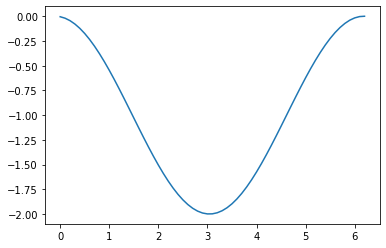

In [102]:
def frange(start, stop, step):
  while start < stop:
    yield float(start)
    start += step


def Compute(df, x_max, dx, y_start = 0, x_min = 0):
  y = y_start
  res_x = []
  res_y = []
  for x in frange(x_min, x_max, dx):
    k1 = df(x,        y)
    k2 = df(x + dx/2, y + dx * k1/2)
    k3 = df(x + dx/2, y + dx * k2/2)
    k4 = df(x + dx,   y + dx * k3)  
    y += (k1 + 2*k2 + 2*k3 + k4) * dx / 6
    res_x.append(x)
    res_y.append(y.copy())
  return (res_x, res_y)



x1, y1 = Compute(dF, 2*np.pi, 0.1, 0)

plt.plot(x1, y1);

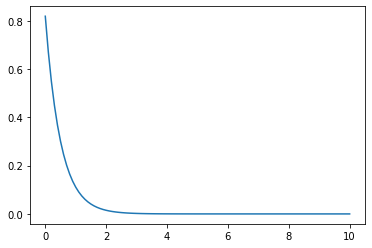

In [27]:
def dF1(x,y):
  return -2*y

x, y = Compute(dF1, 10, 0.1, 1)
plt.plot(x, y);

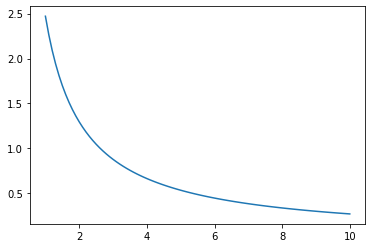

In [28]:
x, y = Compute(lambda x,y: -y/x, 10, 0.1, y_start = np.e, x_min = 1)
plt.plot(x, y);

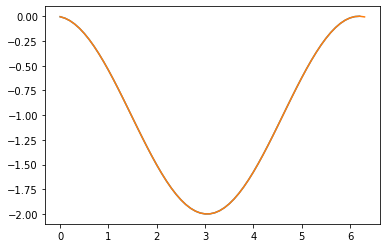

In [54]:
def Runge_Kutta_core(df, x_max, dx, y_start = 0, x_min = 0):
  y = y_start
  res_x = np.arange(x_min, x_max + dx, dx)
  res_y = np.zeros(len(res_x))
  for i in range(len(res_x)):
    k1 = df(res_x[i],        y)
    k2 = df(res_x[i] + dx/2, y + dx * k1/2)
    k3 = df(res_x[i] + dx/2, y + dx * k2/2)
    k4 = df(res_x[i] + dx,   y + dx * k3)  
    y += (k1 + 2*k2 + 2*k3 + k4) * dx / 6
    res_y[i] = y
  return (res_x, res_y)

x,y = Runge_Kutta_core(dF, 2*np.pi, 0.1)
plt.plot(x1, y1, x, y);

In [72]:
def Runge_Kutta(df, x_max, eps, y_start = 0, x_min = 0):
  dx = (x_max - x_min)/10
  err = eps + 1
  RK_count = 0
  while err > eps:
    (x1, y1) = Runge_Kutta_core(df, x_max, dx, y_start, x_min)
    dx /= 2
    (x2, y2) = Runge_Kutta_core(df, x_max, dx, y_start, x_min)
    y22 = y2[::2]
    err = np.sqrt(np.sum((y22 - y1[:len(y22)])**2))/2
    RK_count += 1
  print('Количество вызовов РК - %d раз, ошибка %f' %(RK_count, err))
  return (x2, y2)

Количество вызовов РК - 12 раз, ошибка 0.007761
491496


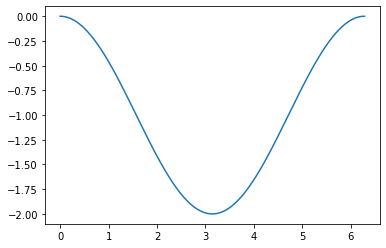

In [74]:
count = 0
def dTest(x,y):
  global count
  count += 1
  return dF(x,y)

x,y = Runge_Kutta(dTest, 2*np.pi, 0.01)
print(count)
del(count)
plt.plot(x,y);

## Решение системы уравнений
Система уравнений:
\begin{cases}
\frac{dx}{dt} = x - 1, 
\\[10pt]
\frac{dy}{dt} = x  + 2 y -3
\end{cases}


Решение системы:
\begin{cases}
x(t) = -C_1 \cdot e^t + 1
\\[10pt]
y(t) = C_1 \cdot e^t + C_2 \cdot e^{2t} + 1
\end{cases}

Были выбраны начальные условия для случая $C_1 = 1$, $C_2 = 1$

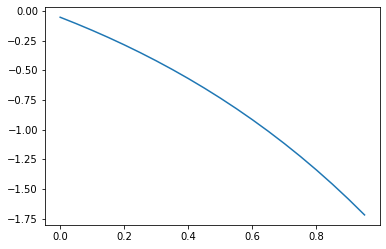

In [121]:
def dF_vect(t,Y):
  return np.array([Y[0] - 1, Y[0] + 2 * Y[1] - 3])

Res = Compute(dF_vect, 1, 0.05, [0., 3.])
a = np.array(Res[1])
X = a.transpose()[0]
Y = a.transpose()[1]

plt.plot(Res[0], X);

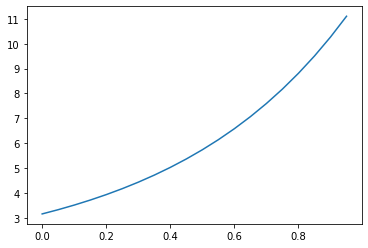

In [122]:
plt.plot(Res[0], Y);

In [124]:
max(Y)

11.107326460031878